In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition  import PCA
from sklearn.manifold import TSNE
from scipy.io import arff

In [174]:
train = pd.read_csv('./archive/train.csv', sep=';')
test = pd.read_csv('./archive/test.csv', sep=';')

train.info()
test.info()

pd.set_option('display.max_columns', None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 co

In [175]:
train.head()
print(train.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [176]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [177]:
print(train.isna().values.any())
print(train.isna().sum())

print(train.duplicated().value_counts())

False
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
False    45211
Name: count, dtype: int64


In [178]:
train.columns = train.columns.str.replace(' ', '')

In [179]:
job_type = train["job"]
print(job_type.value_counts())

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64


In [180]:
marital_status = train["marital"]
print(marital_status.value_counts())

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64


In [181]:
education_status = train["education"]
print(education_status.value_counts())

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64


In [182]:
default_status = train["default"]
print(default_status.value_counts())

default
no     44396
yes      815
Name: count, dtype: int64


In [183]:
housing_loan_status = train["housing"]
print(housing_loan_status.value_counts())

housing
yes    25130
no     20081
Name: count, dtype: int64


In [184]:
personal_loan_status = train["loan"]
print(personal_loan_status.value_counts())

loan
no     37967
yes     7244
Name: count, dtype: int64


In [185]:
contact_type = train["contact"]
print(contact_type.value_counts())

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64


In [186]:
previous_num_of_contacts = train["previous"]
print(previous_num_of_contacts.value_counts())

previous
0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
18         6
22         6
24         5
27         5
29         4
21         4
25         4
30         3
26         2
37         2
28         2
38         2
51         1
275        1
58         1
32         1
40         1
55         1
35         1
41         1
Name: count, dtype: int64


In [187]:
previous_campaign_outcome = train["poutcome"]
print(previous_campaign_outcome.value_counts())

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64


In [188]:
y_status = train["y"]
print(y_status.value_counts())

y
no     39922
yes     5289
Name: count, dtype: int64


### Age

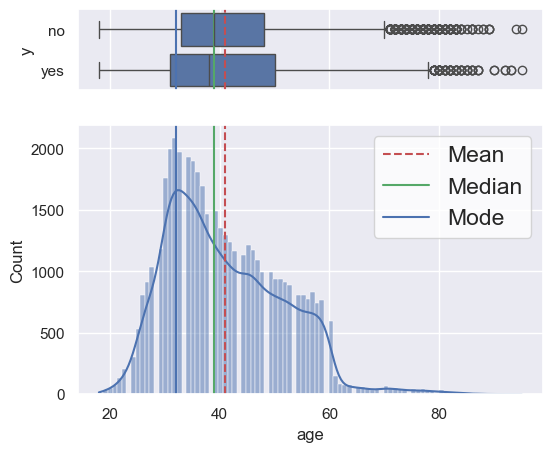

In [189]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
mean=train['age'].mean()
median=train['age'].median()
mode=train['age'].mode().values[0]

age = sns.boxplot(data=train, x="age", y="y", ax=ax_box, order = train["y"].value_counts().index)
# age.set(xscale="log")
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=train, x="age", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

### Job type

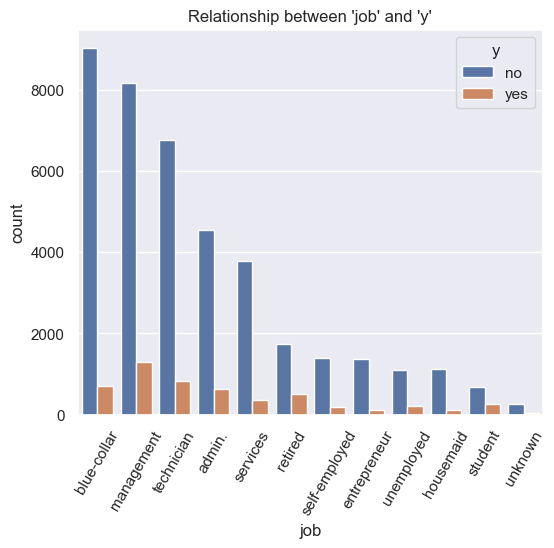

In [190]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
job = sns.countplot(x="job", data = train, hue = "y", order = train["job"].value_counts().index)
job.tick_params(axis='x', rotation=60)
plt.title("Relationship between 'job' and 'y'")
plt.show()

### Marital status

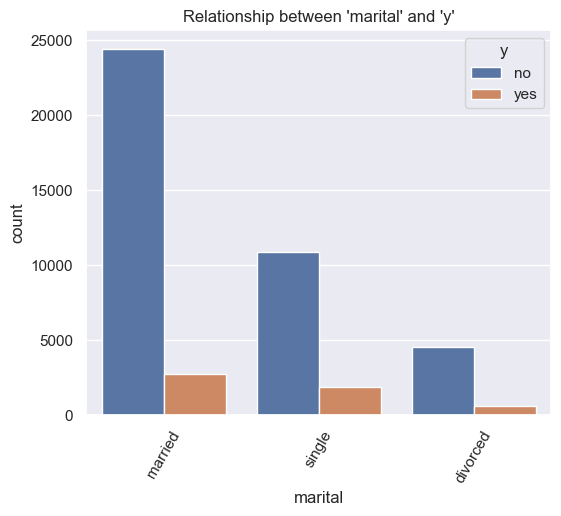

In [191]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
marital = sns.countplot(x="marital", data = train, hue = "y", order = train["marital"].value_counts().index)
marital.tick_params(axis='x', rotation=60)
plt.title("Relationship between 'marital' and 'y'")
plt.show()

### Education status

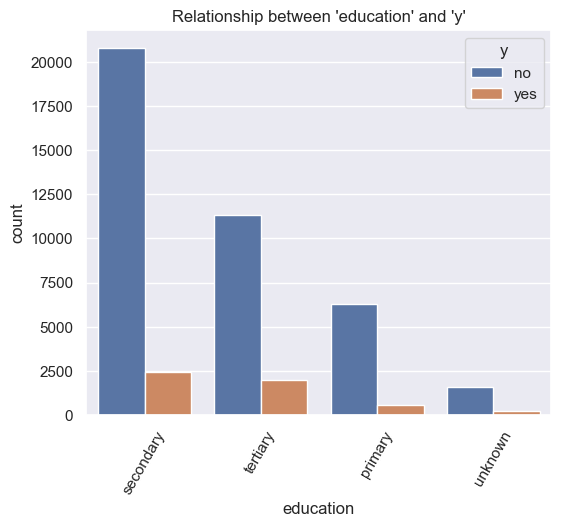

In [192]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
education = sns.countplot(x="education", data = train, hue = "y", order = train["education"].value_counts().index)
education.tick_params(axis='x', rotation=60)
plt.title("Relationship between 'education' and 'y'")
plt.show()

### Credit default status

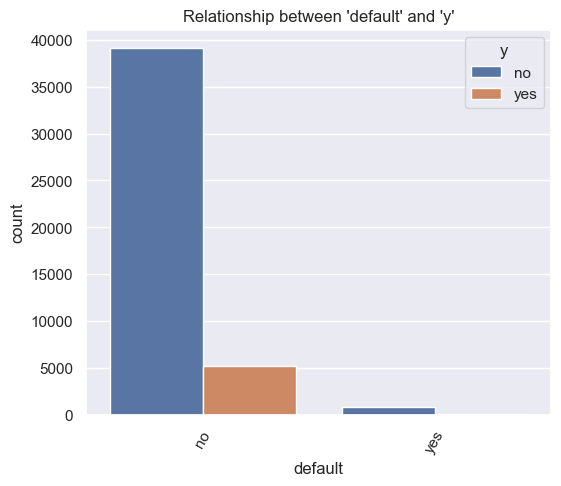

In [193]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
default = sns.countplot(x="default", data = train, hue = "y", order = train["default"].value_counts().index)
default.tick_params(axis='x', rotation=60)
plt.title("Relationship between 'default' and 'y'")
plt.show()

### Average yearly balance

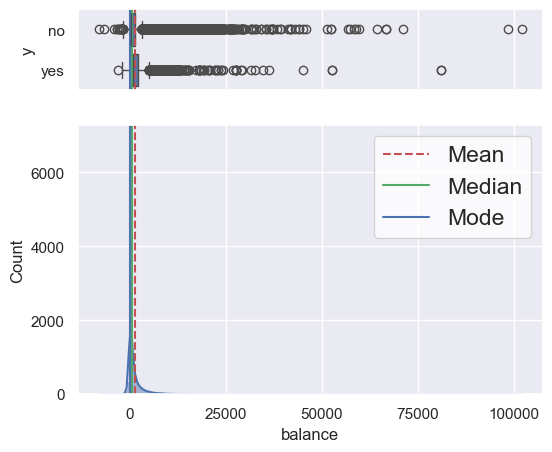

In [194]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
mean=train['balance'].mean()
median=train['balance'].median()
mode=train['balance'].mode().values[0]

balance = sns.boxplot(data=train, x="balance", y="y", ax=ax_box, order = train["y"].value_counts().index)
# age.set(xscale="log")
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=train, x="balance", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

### Housing loan status

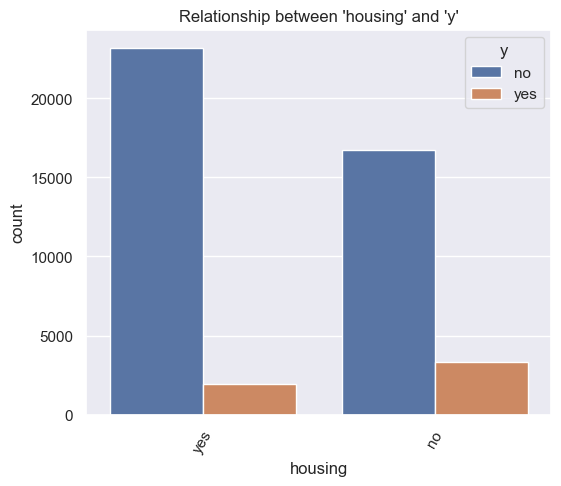

In [195]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
housing = sns.countplot(x="housing", data = train, hue = "y", order = train["housing"].value_counts().index)
housing.tick_params(axis='x', rotation=60)
plt.title("Relationship between 'housing' and 'y'")
plt.show()

### Personal loan status

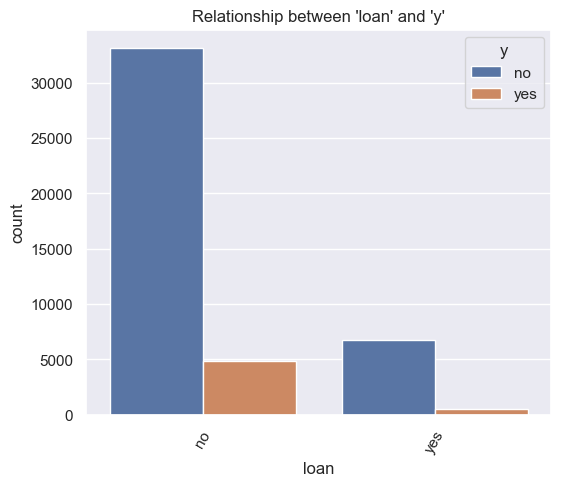

In [196]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
loan = sns.countplot(x="loan", data = train, hue = "y", order = train["loan"].value_counts().index)
loan.tick_params(axis='x', rotation=60)
plt.title("Relationship between 'loan' and 'y'")
plt.show()

### Contact communication type

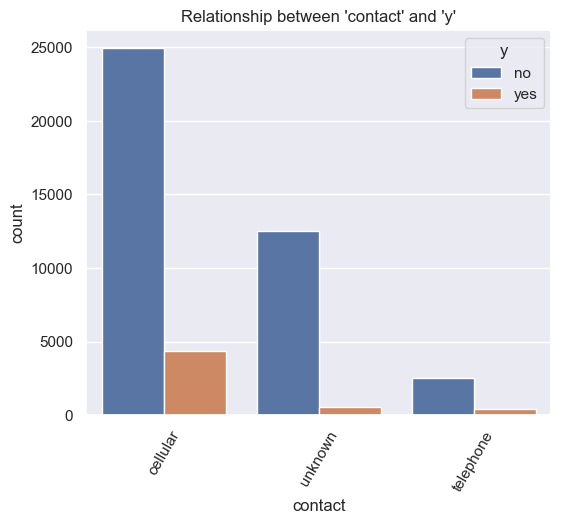

In [197]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
contact = sns.countplot(x="contact", data = train, hue = "y", order = train["contact"].value_counts().index)
contact.tick_params(axis='x', rotation=60)
plt.title("Relationship between 'contact' and 'y'")
plt.show()

### Last contact day of the month

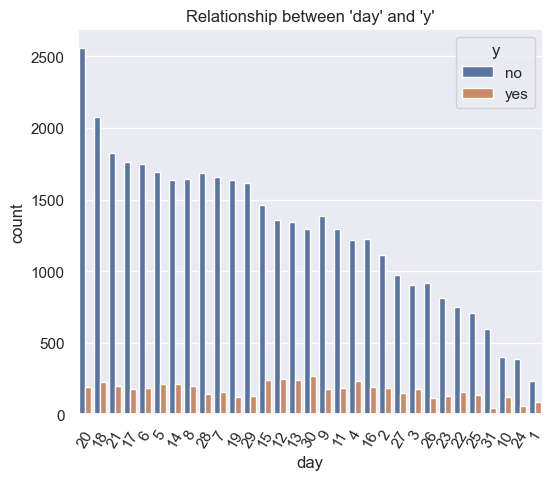

In [198]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
month = sns.countplot(x="day", data = train, hue = "y", order = train["day"].value_counts().index)
month.tick_params(axis='x', rotation=60)
plt.title("Relationship between 'day' and 'y'")
plt.show()

### Last contact month of the year

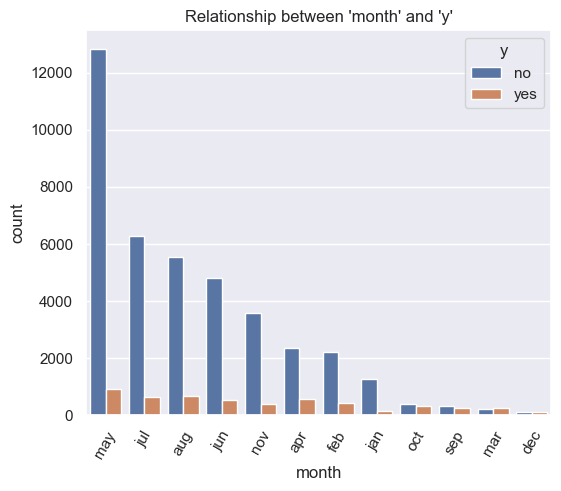

In [199]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
month = sns.countplot(x="month", data = train, hue = "y", order = train["month"].value_counts().index)
month.tick_params(axis='x', rotation=60)
plt.title("Relationship between 'month' and 'y'")
plt.show()

### Last contact duration (in seconds)

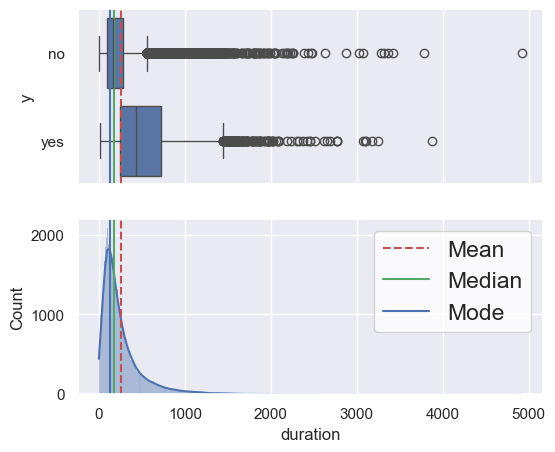

In [200]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True) # gridspec_kw= {"height_ratios": (0.3, 1)}
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
mean=train['duration'].mean()
median=train['duration'].median()
mode=train['duration'].mode().values[0]

duration = sns.boxplot(data=train, x="duration", y="y", ax=ax_box, order = train["y"].value_counts().index)
# age.set(xscale="log")
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=train, x="duration", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

### Number of contacts performed during this campaign

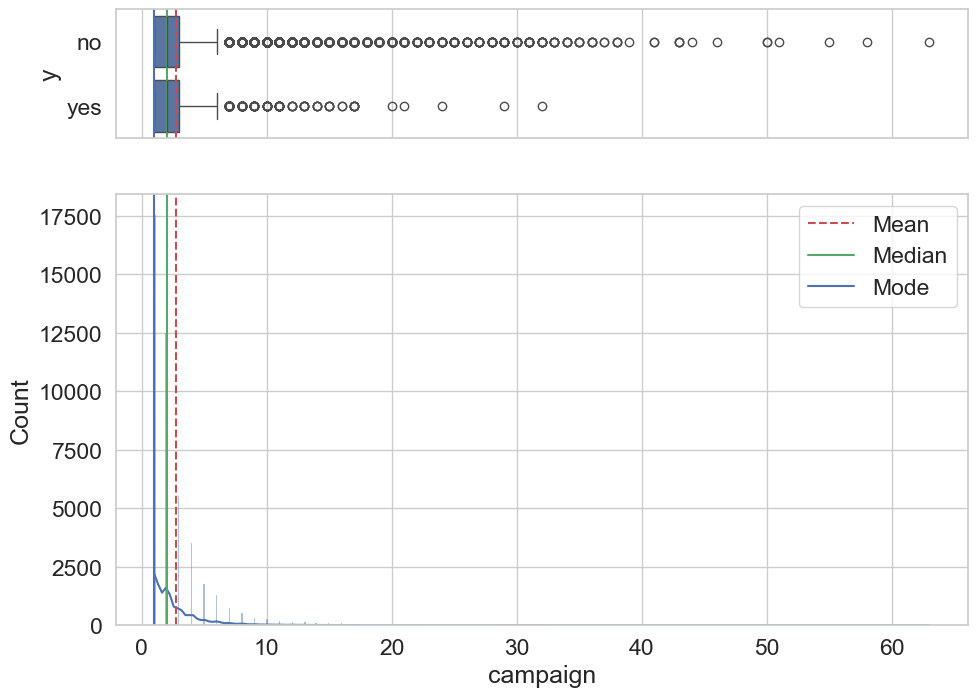

In [201]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
mean=train['campaign'].mean()
median=train['campaign'].median()
mode=train['campaign'].mode().values[0]

campaign = sns.boxplot(data=train, x="campaign", y="y", ax=ax_box, order = train["y"].value_counts().index)
# age.set(xscale="log")
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=train, x="campaign", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

### Number of days since last contact

40.19782796222158
-1.0


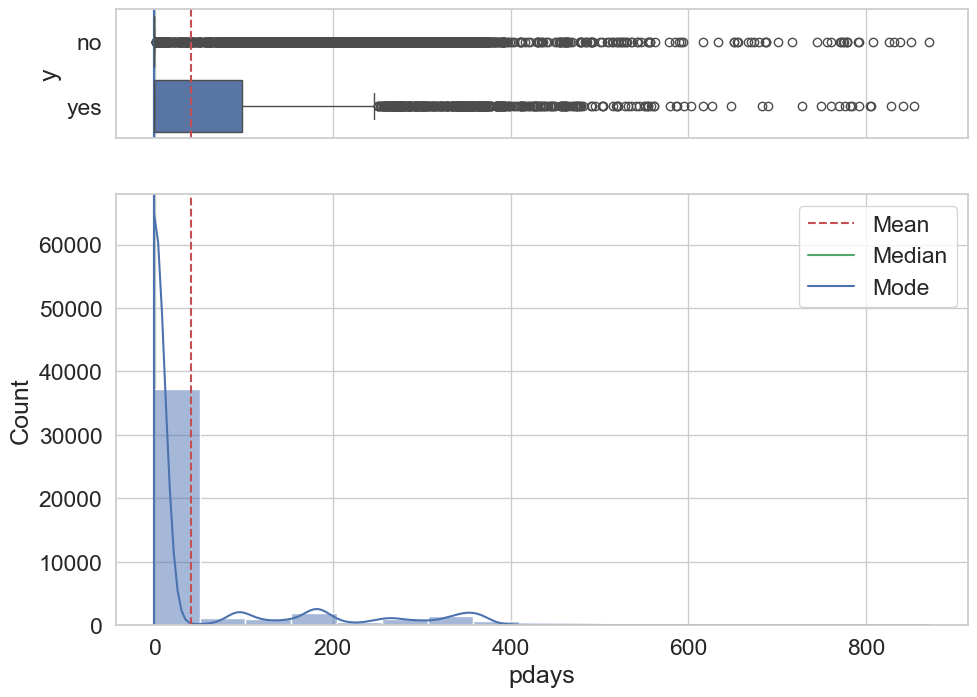

In [202]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
mean=train['pdays'].mean()
print(mean)
median=train['pdays'].median()
print(median)
mode=train['pdays'].mode().values[0]

pdays = sns.boxplot(data=train, x="pdays", y="y", ax=ax_box, order = train["y"].value_counts().index)
# age.set(xscale="log")
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=train, x="pdays", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

### Number of contacts before this campaign

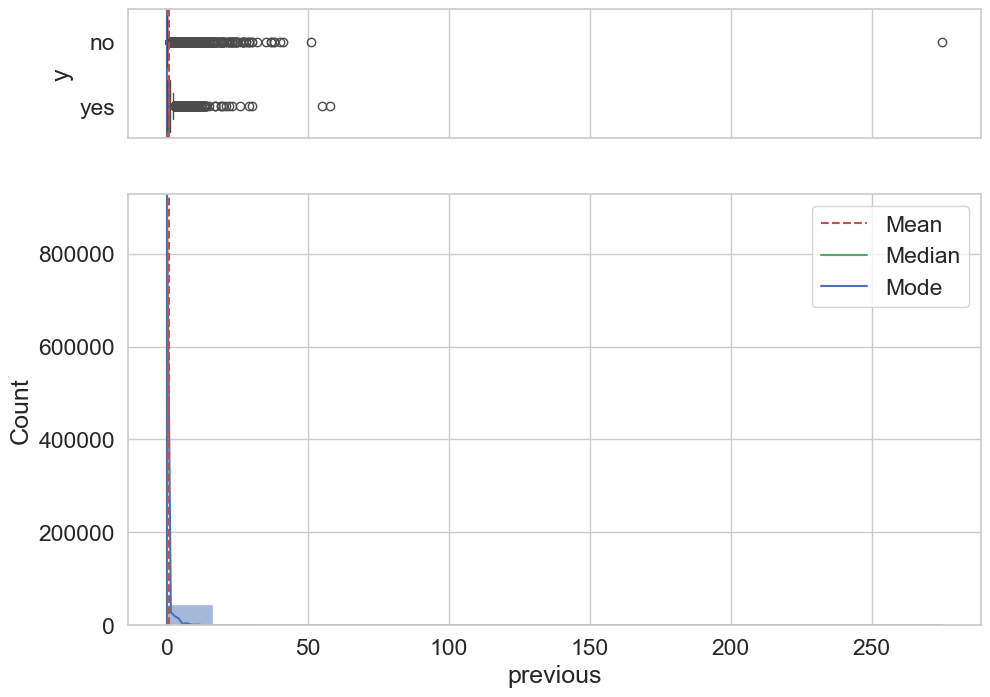

In [203]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(10,7)}, font_scale=1.5, style='whitegrid')
mean=train['previous'].mean()
median=train['previous'].median()
mode=train['previous'].mode().values[0]

previous = sns.boxplot(data=train, x="previous", y="y", ax=ax_box, order = train["y"].value_counts().index)
# age.set(xscale="log")
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=train, x="previous", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

### Outcome of previous marketing campaign

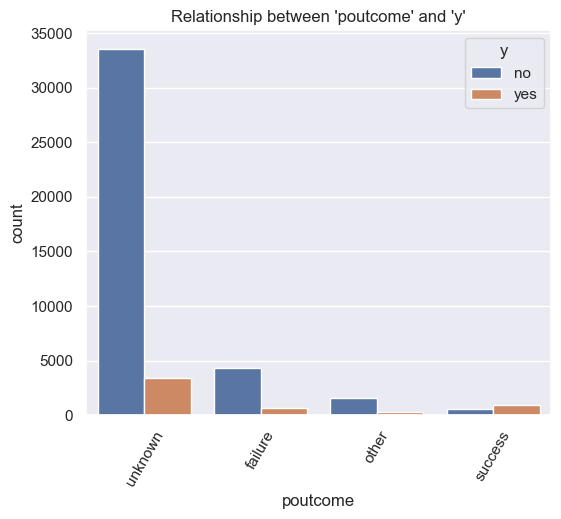

In [204]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
poutcome = sns.countplot(x="poutcome", data = train, hue = "y", order = train["poutcome"].value_counts().index)
poutcome.tick_params(axis='x', rotation=60)
plt.title("Relationship between 'poutcome' and 'y'")
plt.show()

### Target (Client subscribed term deposit ?)

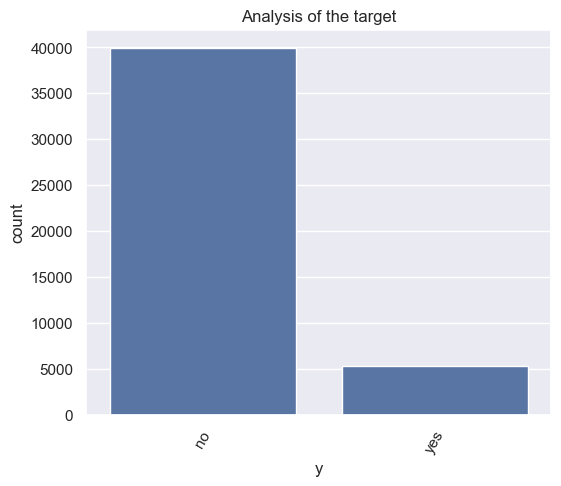

In [205]:
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(6, 5)})
target = sns.countplot(x="y", data = train, order = train["y"].value_counts().index)
target.tick_params(axis='x', rotation=60)
plt.title("Analysis of the target")
plt.show()

In [206]:
train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [207]:
data = pd.concat([train, test], ignore_index=True)
#data = pd.read_csv('C:\\Users\\Dell\\Desktop\\final project SSD\\archive\\train.csv', sep=';')

# Step 2: Convert the original 'y' column to 1/0
# Map 'yes' to 1 and 'no' to 0
data['y'] = data['y'].map({'yes': 1, 'no': 0})

# Step 3: Convert categorical columns to numerical using one-hot encoding
# Identify categorical columns (excluding 'y' as it has been converted already)
categorical_columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]

# Apply one-hot encoding to categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Step 4: Normalize numerical columns
# Identify numerical columns (exclude columns that were one-hot encoded)
numerical_columns = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the numerical columns and transform them
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

# Step 5: Convert boolean values (True/False) to integers (1/0) without affecting other data
# Only convert the columns with boolean values
bool_columns = data_encoded.select_dtypes(include=['bool']).columns
data_encoded[bool_columns] = data_encoded[bool_columns].astype(int)

# Step 6: Display the normalized dataset with the updated 'y' column
print("Normalized Data:")
print(data_encoded.head())

# Optional: Save the normalized dataset to a new CSV file
data_encoded.to_csv('normalized_dataset.csv', index=False, sep=';')

Normalized Data:
        age   balance       day  duration  campaign  pdays  previous  y  \
0  0.519481  0.092259  0.133333  0.053070       0.0    0.0       0.0  0   
1  0.337662  0.073067  0.133333  0.030704       0.0    0.0       0.0  0   
2  0.194805  0.072822  0.133333  0.015453       0.0    0.0       0.0  0   
3  0.376623  0.086476  0.133333  0.018707       0.0    0.0       0.0  0   
4  0.194805  0.072812  0.133333  0.040260       0.0    0.0       0.0  0   

   job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0           0                0                 0              0   
1           0                0                 0              0   
2           0                0                 1              0   
3           0                1                 0              0   
4           0                0                 0              0   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0               1            0                  0

In [208]:
print(data_encoded.columns.tolist())

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


In [209]:
# Find columns with only one unique value
constant_columns = [col for col in data_encoded.columns if data_encoded[col].nunique() == 1]
print("Columns with constant values:", constant_columns)

Columns with constant values: []


In [210]:
# Find columns with more than 70% missing values
missing_percentage = data_encoded.isnull().mean() * 100
redundant_columns = missing_percentage[missing_percentage > 70].index.tolist()
print("Columns with more than 70% missing values:", redundant_columns)

Columns with more than 70% missing values: []


Top 10 Positive Correlations:
 poutcome_failure    pdays              0.701718
education_tertiary  job_management     0.597728
previous            pdays              0.461822
month_jun           contact_unknown    0.452299
job_retired         age                0.447901
month_may           housing_yes        0.426623
                    contact_unknown    0.426265
poutcome_other      pdays              0.389126
poutcome_failure    previous           0.358072
education_primary   job_blue-collar    0.342979
dtype: float64

Top 10 Negative Correlations:
 default_yes         default_no            -1.000000
loan_yes            loan_no               -1.000000
housing_yes         housing_no            -1.000000
poutcome_unknown    pdays                 -0.869758
contact_unknown     contact_cellular      -0.862097
marital_single      marital_married       -0.771629
poutcome_unknown    poutcome_failure      -0.738382
education_tertiary  education_secondary   -0.663152
poutcome_unknown    previo

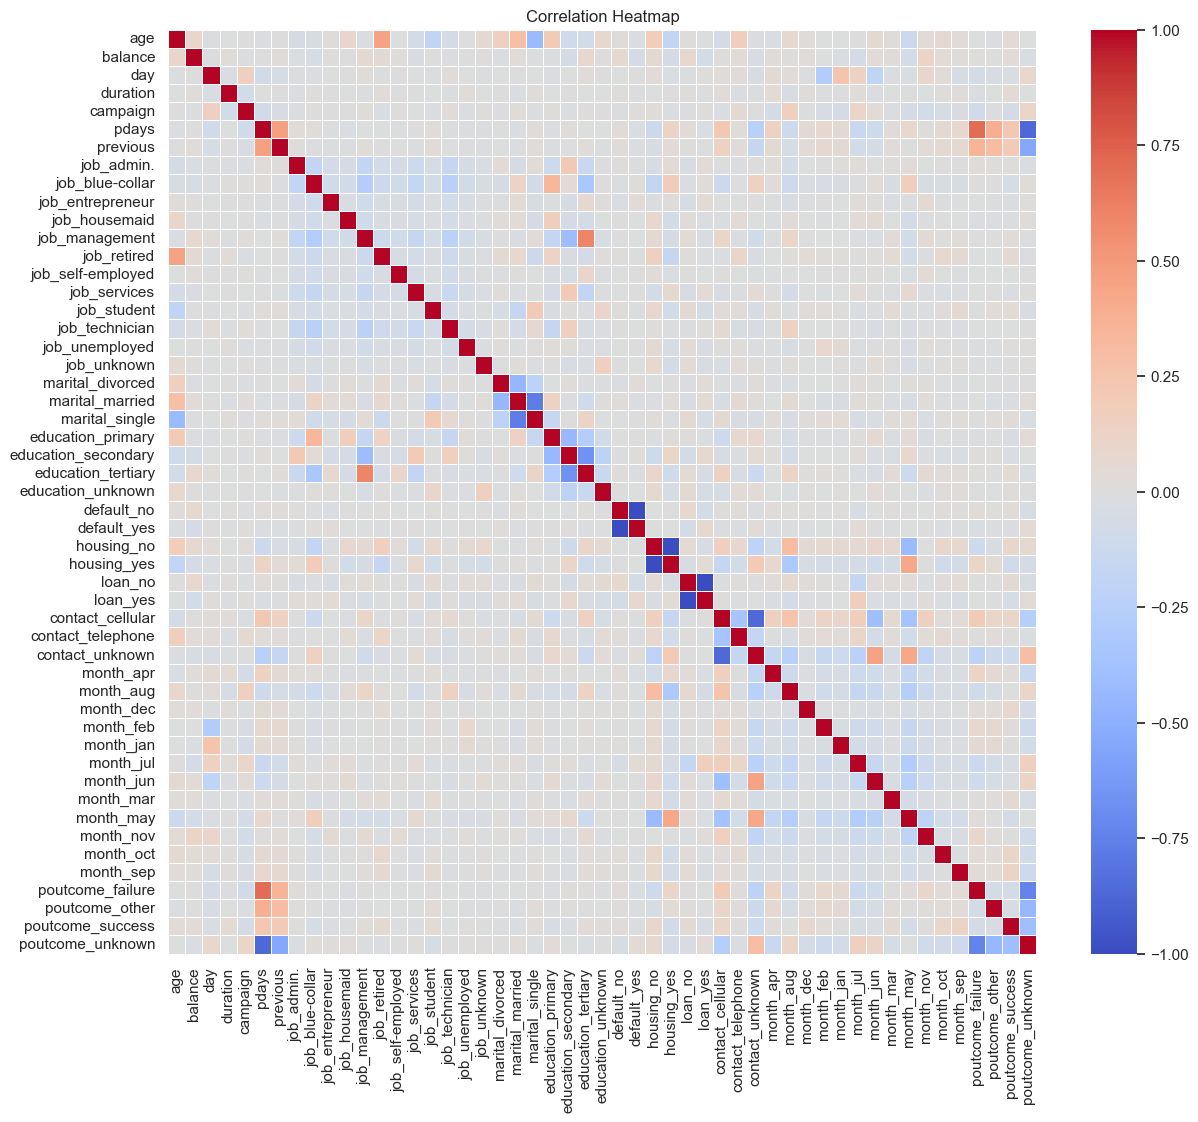

In [211]:
# Step 1: Load the normalized dataset
# Assuming 'data_encoded' is already available as the normalized dataset from previous steps

# Step 2: Remove the y column ('y') from the dataset
data_encoded_filtered = data_encoded.drop(['y'], axis=1)

# Step 3: Calculate the correlation matrix for the filtered dataset
corr_matrix = data_encoded_filtered.corr()

# Step 4: Extract the upper triangle of the correlation matrix (excluding the diagonal)
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Step 5: Separate positive and negative correlations
# Flatten the matrix and drop NA values
flattened_corr = upper_triangle.unstack().dropna()

# Get the top 10 positive correlations (sorted by value)
top_10_positive = flattened_corr[flattened_corr > 0].sort_values(ascending=False).head(10)
print("Top 10 Positive Correlations:\n", top_10_positive)

# Get the top 10 negative correlations (sorted by value)
top_10_negative = flattened_corr[flattened_corr < 0].sort_values().head(10)
print("\nTop 10 Negative Correlations:\n", top_10_negative)

# Step 6: Plot the correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [212]:
# Step 1: Load the dataset
# Assuming 'data_encoded' is your normalized dataset

target_label = 'y'

# Drop the target label column from the feature set
X = data_encoded.drop([target_label], axis=1)
y = data_encoded[target_label]

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train the baseline KNN model and evaluate accuracy
baseline_knn = KNeighborsClassifier(n_neighbors=5)
baseline_knn.fit(X_train, y_train)
y_pred_baseline = baseline_knn.predict(X_test)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print("Baseline KNN Accuracy:", baseline_accuracy)

# Step 4: Identify anomalies using KNN-based distance
# Use KNN for anomaly detection based on the distance from the nearest neighbors
knn_model = NearestNeighbors(n_neighbors=5)
knn_model.fit(X_train)

# Calculate the distance to the 5th nearest neighbor
distances, indices = knn_model.kneighbors(X_train)

# Set a threshold for outlier detection based on the distance to the 5th nearest neighbor
threshold = np.percentile(distances[:, 4], 95)  # Consider top 5% as anomalies
anomaly_labels_knn = (distances[:, 4] > threshold).astype(int)  # 1 for anomaly, 0 for normal

# Filter out anomalies from the training set
X_train_no_anomalies = X_train[anomaly_labels_knn == 0]
y_train_no_anomalies = y_train[anomaly_labels_knn == 0]

# Step 5: Retrain the KNN model on the data without anomalies
knn_no_anomalies = KNeighborsClassifier(n_neighbors=5)
knn_no_anomalies.fit(X_train_no_anomalies, y_train_no_anomalies)
y_pred_knn_no_anomalies = knn_no_anomalies.predict(X_test)
knn_no_anomalies_accuracy = accuracy_score(y_test, y_pred_knn_no_anomalies)
print("KNN Accuracy After Removing Anomalies:", knn_no_anomalies_accuracy)

# Step 6: Train a Decision Tree classifier to further detect anomalies
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Predict anomalies on the test set using the Decision Tree
y_pred_decision_tree = decision_tree.predict(X_test)

# Evaluate Decision Tree accuracy
decision_tree_accuracy = accuracy_score(y_test, y_pred_decision_tree)
print("Decision Tree Accuracy:", decision_tree_accuracy)

# Step 7: Analyze anomalies detected by Decision Tree
anomalies_dt = X_test[y_pred_decision_tree == 1]
print("Number of anomalies detected by the Decision Tree:", len(anomalies_dt))

# Step 8: Test the KNN model on the test data without anomalies detected by Decision Tree
X_test_no_anomalies = X_test[y_pred_decision_tree == 0]
y_test_no_anomalies = y_test[y_pred_decision_tree == 0]

y_pred_knn_final = knn_no_anomalies.predict(X_test_no_anomalies)
final_knn_accuracy = accuracy_score(y_test_no_anomalies, y_pred_knn_final)
print("Final KNN Accuracy After Removing Decision Tree Detected Anomalies:", final_knn_accuracy)

Baseline KNN Accuracy: 0.8940348525469168
KNN Accuracy After Removing Anomalies: 0.8929624664879356
Decision Tree Accuracy: 0.8921581769436997
Number of anomalies detected by the Decision Tree: 1844
Final KNN Accuracy After Removing Decision Tree Detected Anomalies: 0.9369073111043132


% of variance retained by various componets

[15.3 25.1 34.7 43.5 49.6 55.  59.6 63.3 66.8 70.1 73.  75.6 77.8 79.9
 81.9 83.8 85.5 87.  88.3 89.5 90.6 91.7 92.7 93.6 94.4 95.2 95.9 96.5
 97.1 97.7 98.1 98.5 98.8 99.  99.2 99.3 99.4 99.5 99.6 99.6 99.6 99.6
 99.6 99.6 99.6 99.6 99.6 99.6 99.6 99.6 99.6]


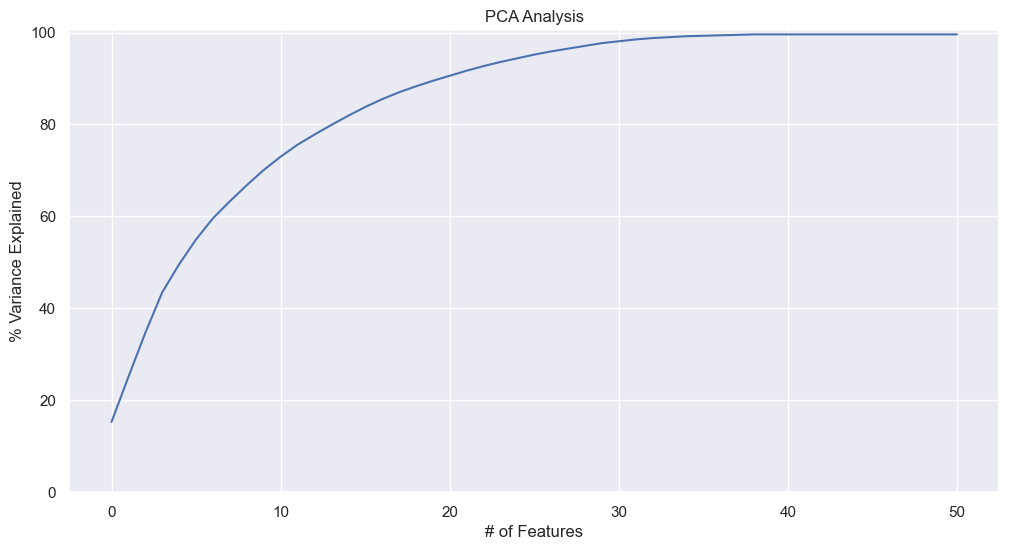

In [213]:
#data_encoded_filtered
pca=PCA(n_components=data_encoded_filtered.shape[1])
pca.fit(data_encoded_filtered)
variance = pca.explained_variance_ratio_
var = np.cumsum(np.round(variance, 3)*100)

plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
print('% of variance retained by various componets')
plt.plot(var)
print("")
print(var)

In [214]:
knn=[]

variance_retained=[60,70, 80,90,99]
for variance in variance_retained:
  components_pca=np.argmax(var>=variance)+1
  pca_=PCA(n_components=components_pca)
  X_pca=pca_.fit_transform(data_encoded_filtered)
  print(f'Shape of original dataset:{data_encoded_filtered.shape}')
  print(f'Shape of dataset after after Dimesnionality Reduction with {variance}% variance retained: {X_pca.shape}\n')

  print('-------Accuracy on BASELINE KNN model-----\n')

  print(f'KNN : {baseline_accuracy}\n')


  X_train_pca,X_test_pca,y_train_pca, y_test_pca=train_test_split(X_pca, y, test_size=0.4, random_state=42,stratify=y)

  knn_clf_pca = KNeighborsClassifier()
  knn_clf_pca.fit(X_train_pca,y_train_pca)
  y_pred_knn_pca=knn_clf_pca.predict(X_test_pca)
  acc_knn_pca=accuracy_score(y_pred_knn_pca,y_test_pca)
  knn.append(acc_knn_pca)


  print(f'-------Accuracy after dimensionality reduction with PCA {variance}% (variance retained)----------\n')
  print(f'KNN : {acc_knn_pca}')
  print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx\n")



Shape of original dataset:(49732, 51)
Shape of dataset after after Dimesnionality Reduction with 60% variance retained: (49732, 8)

-------Accuracy on BASELINE KNN model-----

KNN : 0.8940348525469168

-------Accuracy after dimensionality reduction with PCA 60% (variance retained)----------

KNN : 0.8815161111948927
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Shape of original dataset:(49732, 51)
Shape of dataset after after Dimesnionality Reduction with 70% variance retained: (49732, 10)

-------Accuracy on BASELINE KNN model-----

KNN : 0.8940348525469168

-------Accuracy after dimensionality reduction with PCA 70% (variance retained)----------

KNN : 0.8817171869501835
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Shape of original dataset:(49732, 51)
Shape of dataset after after Dimesnionality Reduction with 80% variance retained: (49732, 15)

-------Accuracy on BASELINE KNN model-----

KNN : 0.8940348525469168

-------Accuracy after dimensionality reduction with PCA 80% 

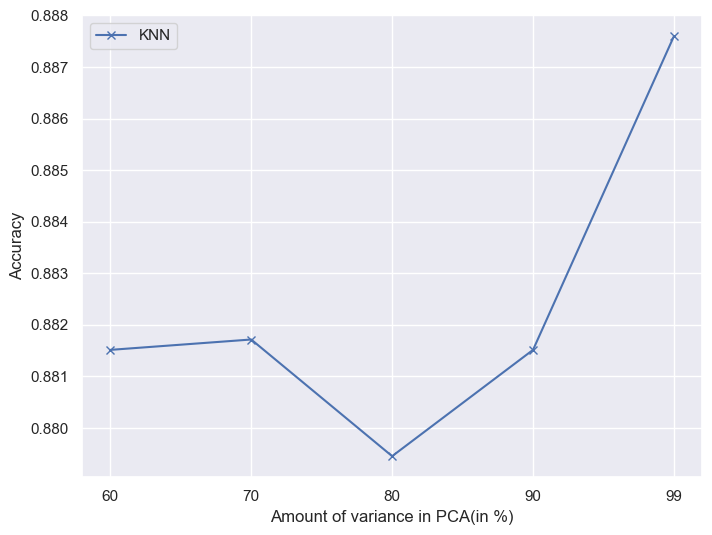

In [215]:
x=[0,1,2,3,4]
variance_retained=[60,70, 80,90,99]
plt.figure(figsize=(8,6))
plt.plot(knn, label='KNN',marker='x')
plt.xticks(x,variance_retained)
plt.ylabel('Accuracy')
plt.xlabel('Amount of variance in PCA(in %)')
plt.legend()
plt.show()

In [216]:
variance = 99
components_pca=np.argmax(var>=variance)+1
#n_components = 5  # Select the number of components you want to retain
pca = PCA(n_components=components_pca)
X_pca = pca.fit_transform(data_encoded_filtered)

# Step 3: Extract principal components
principal_components = pca.components_

explained_variance = pca.explained_variance_ratio_

# Step 5: Print or analyze the results
print(f"Shape of PCA-transformed dataset: {X_pca.shape}")
print("Principal components (coefficients for each original feature):")
print(principal_components)

print("Explained variance ratio for each principal component:")
print(explained_variance)

Shape of PCA-transformed dataset: (49732, 34)
Principal components (coefficients for each original feature):
[[-0.01744795 -0.00302505 -0.01670641 ... -0.00689177 -0.02892994
   0.04799018]
 [-0.06862286  0.00054285 -0.00401401 ...  0.03640982  0.01367086
  -0.17067789]
 [-0.02660167 -0.00275136  0.00659037 ...  0.0432505   0.01938358
  -0.20830916]
 ...
 [ 0.05296013  0.00628015  0.00381914 ...  0.03755967 -0.10233674
   0.03948778]
 [ 0.03123916  0.00138406  0.05557568 ...  0.01064074 -0.05829925
   0.02953698]
 [ 0.06760211  0.00284514  0.00591707 ...  0.00145548 -0.00022589
  -0.00389955]]
Explained variance ratio for each principal component:
[0.15334394 0.09836369 0.0961628  0.08832484 0.06116481 0.05357161
 0.04604193 0.03739629 0.0345405  0.03340329 0.02938874 0.02593072
 0.02229533 0.02147947 0.02039959 0.01872875 0.01714319 0.01505917
 0.01305276 0.01210619 0.01128141 0.01100672 0.00982309 0.00899041
 0.00777991 0.00760148 0.00739736 0.00634689 0.00589556 0.00573709
 0.004499

In [217]:
# Step 1: Load the dataset
# Assuming 'data_encoded' is your normalized dataset

target_label = 'y'

# Drop the target label column from the feature set
X = data_encoded.drop([target_label], axis=1)
y = data_encoded[target_label]

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## PCA
variance = 99
components_pca=np.argmax(var>=variance)+1
#n_components = 5  # Select the number of components you want to retain
pca = PCA(n_components=components_pca)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)



# Step 3: Train the baseline KNN model and evaluate accuracy
baseline_knn = KNeighborsClassifier(n_neighbors=5)
baseline_knn.fit(X_train_pca, y_train)
y_pred_baseline = baseline_knn.predict(X_test_pca)
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print("Baseline KNN Accuracy:", baseline_accuracy)

# Step 4: Identify anomalies using KNN-based distance
# Use KNN for anomaly detection based on the distance from the nearest neighbors
knn_model = NearestNeighbors(n_neighbors=5)
knn_model.fit(X_train_pca)

# Calculate the distance to the 5th nearest neighbor
distances, indices = knn_model.kneighbors(X_train_pca)

# Set a threshold for outlier detection based on the distance to the 5th nearest neighbor
threshold = np.percentile(distances[:, 4], 95)  # Consider top 5% as anomalies
anomaly_labels_knn = (distances[:, 4] > threshold).astype(int)  # 1 for anomaly, 0 for normal

# Filter out anomalies from the training set
X_train_no_anomalies = X_train_pca[anomaly_labels_knn == 0]
y_train_no_anomalies = y_train[anomaly_labels_knn == 0]

# Step 5: Retrain the KNN model on the data without anomalies
knn_no_anomalies = KNeighborsClassifier(n_neighbors=5)
knn_no_anomalies.fit(X_train_no_anomalies, y_train_no_anomalies)
y_pred_knn_no_anomalies = knn_no_anomalies.predict(X_test_pca)
knn_no_anomalies_accuracy = accuracy_score(y_test, y_pred_knn_no_anomalies)
print("KNN Accuracy After Removing Anomalies:", knn_no_anomalies_accuracy)

# Step 6: Train a Decision Tree classifier to further detect anomalies
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_pca, y_train)

# Predict anomalies on the test set using the Decision Tree
y_pred_decision_tree = decision_tree.predict(X_test_pca)

# Evaluate Decision Tree accuracy
decision_tree_accuracy = accuracy_score(y_test, y_pred_decision_tree)
print("Decision Tree Accuracy:", decision_tree_accuracy)

# Step 7: Analyze anomalies detected by Decision Tree
anomalies_dt = X_test_pca[y_pred_decision_tree == 1]
print("Number of anomalies detected by the Decision Tree:", len(anomalies_dt))

# Step 8: Test the KNN model on the test data without anomalies detected by Decision Tree
X_test_no_anomalies = X_test_pca[y_pred_decision_tree == 0]
y_test_no_anomalies = y_test[y_pred_decision_tree == 0]

y_pred_knn_final = knn_no_anomalies.predict(X_test_no_anomalies)
final_knn_accuracy = accuracy_score(y_test_no_anomalies, y_pred_knn_final)
print("Final KNN Accuracy After Removing Decision Tree Detected Anomalies:", final_knn_accuracy)

Baseline KNN Accuracy: 0.8474530831099196
KNN Accuracy After Removing Anomalies: 0.8489946380697051
Decision Tree Accuracy: 0.7252680965147453
Number of anomalies detected by the Decision Tree: 3376
Final KNN Accuracy After Removing Decision Tree Detected Anomalies: 0.856029106029106


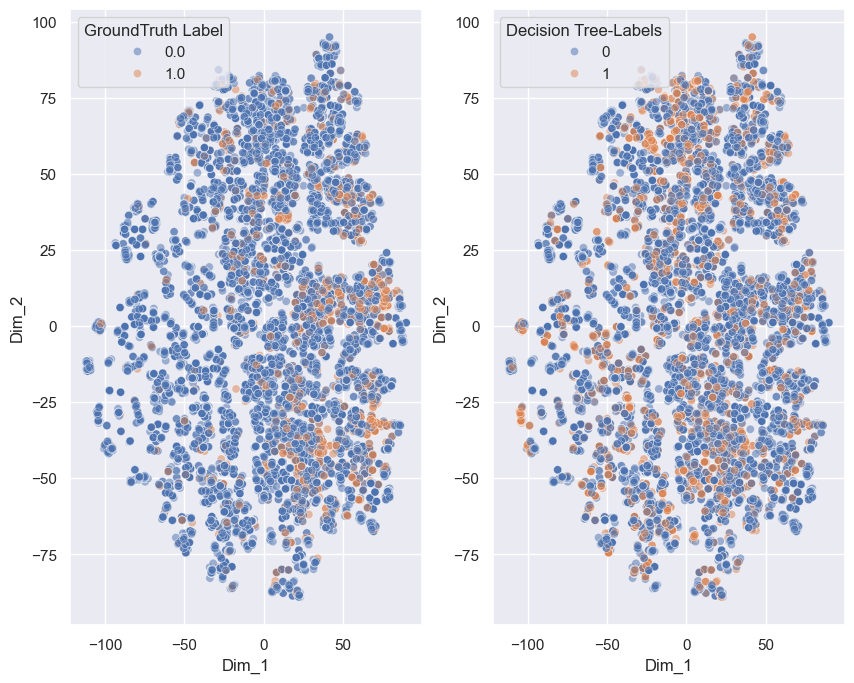

In [218]:
# Performing tsne transformation on the data for helping in visualisation later
tsne=TSNE(n_components=2, random_state=42,perplexity=40)
X_tsne=tsne.fit_transform(X_test_pca)
labels=np.array(y_test).reshape(-1,1)
# creating a new data frame which help us in plotting the t SNE transformed data
tsne_data = np.concatenate((X_tsne, labels), axis=1)
tsne_df = pd.DataFrame(data = tsne_data,columns =("Dim_1", "Dim_2", "GroundTruth Label"))

tsne_df_copy= tsne_df.copy()
tsne_df_copy['Decision Tree-Labels']= y_pred_decision_tree


# Relevant code for plotting the given class labels and cluster labels
colors = sns.color_palette()

modes_gt=tsne_df_copy['GroundTruth Label'].unique()
palette_gt = {mode: color for mode, color in zip(modes_gt, colors)}

modes_clus=tsne_df_copy['Decision Tree-Labels'].unique()
palette_clus = {mode: color for mode, color in zip(modes_clus, colors)}

plt.figure(figsize = (10, 8))
# plotting tsne for groundtruth labels
ax = plt.subplot(1,2,1)
sns.scatterplot(x="Dim_1", y="Dim_2", data=tsne_df_copy, ax= ax,hue='GroundTruth Label',palette=palette_gt,alpha=0.5);
# plotting tsne for cluster labels using Decision Tree
ax = plt.subplot(1,2,2)
sns.scatterplot(x="Dim_1", y="Dim_2", data=tsne_df_copy, ax= ax, hue='Decision Tree-Labels',palette=palette_clus,alpha=0.5);
plt.show()